<center> <h1> Optimizing Welcome Weekends!</h1> </center>

<center> <h2> Spring 2020 - CS 524 - Final Project</h2> </center>

---

<center> <h3>Yizhou Yao (Lead Analyst), Jiaze Ma (Lead Modeller), Mehmet Furkan Demirel (Lead Coder)</h3> </center>
<br />
<div align="center"> <i>{yyao78, jma258, demirel}@wisc.edu</i> </div>

---
## 0. Table of Contents
* [1. Introduction](#intro)  
* [2. Main Optimization Model](#opt) 
    * [2.2. Parameters and Decision Variable](#variables)  
    * [2.2. Objective](#obj)  
    * [2.3. Constraints](#const)  
    * [2.4. Optimization Problem](#finalopt)     
* [3. Data](#data)  
    * [3.1. Data Description](#datadesc)
* [4. Implementation](#code)
* [5. Results](#results)
* [6. Analysis and Discussion](#analysis)
    * [6.1. Sensitivity Analysis ](#sensanalysis)
    * [6.2. Satisfaction Analysis of Students and Professors](#satisanalysis)
    * [6.3. Satisfaction Analysis with Various $\alpha$](#alphaanalysis)
* [7. Conclusion](#conclusion)
* [8. Author Contributions](#authors)
* [9. Acknowledgements](#authors)

---

<a id="intro"></a>

## 1. Introduction

Many university departments across the United States organize annual welcome weekend/open house events for their prospective graduate students. Admitted students from all around the world come to these events to get a taste of how it would be like to be a graduate student at the departments that they are admitted to. 

Without a question, the most difficult part in organizing these events is to come up with a optimal schedule for professor-student meetings in which students try to learn more about the research of the faculty that they are interested in working with should they accept the offer. In order to arrange these meetings, departments usually ask prospective students of their top $N$ professors that they want to meet with, and try to **maximize** the number of students who will meet with professors that they listed as their top choices.

To save on the labor of arranging the schedule, we developed a systematical method of optimizing the professor-student meeting schedules. The basic idea of this model can be described as follows: we first obtain the availability of each professor and the students' preference. Then, we formulate a model to maximize both the student satisfaction, subject to the availability of professors. We also considered the satisfaction of the professors and formulated this problem with a bi-objective. To have more insights of the model, we performed an extensive analysis on the results. For example, sensitivity analysis was done to examine the specific availabilities of professors that have the largest impact on the objective value. This information can be used for asking the professors with important time slots to change their availability. In order to avoid the extreme case where a specific student has very low satisfaction, a set of histograms was given to check the satisfaction distribution of students. Almost all practical issues that might be encountered in real life were considered within the model in form of constraints. Using the real world data and leveraging the optimization methodology, the proposed model is able to solve the intrinsic school visiting scheduling problem.

One of our team members, Mehmet, has been helping the Department of Computer Science at the University of Wisconsin-Madison for the last two years in [organizing these welcome weekends](https://www.cs.wisc.edu/welcome-weekend-2020-schedule/) in the spring, and has seen the amount of manual labor it takes to optimize professor-student meetings. Therefore, we strongly believe that these optimization problems are particularly interesting to solve and will be very useful in organizing these events, which definitely play a vital role in every prospective student's decision as to which school to join.

---

<a id="opt"></a>
## 2. Main Optimization Model

Let's mathematically define the aforementioned optimization problem.  

<a id="variables"></a>
### 2.1. Parameters and Decision Variable

We will first define the parameters that we will be using in our optimization model:

* $C^S$ is the matrix for students' interests in the faculty where $C^S_{s,p} \in \{1, 2, 3, 4, 5\}$ is the coefficient that shows the interest of student $s$ in meeting professor $p$. A higher number indicates more interest.
* $C^P$ is the matrix for professors' interests in the students where $C^P_{s,p} \in \{1, 2, 3, 4, 5\}$ is the coefficient that shows the interest of professor $p$ in meeting student $s$. A higher number indicates more interest.
* $T$ is the matrix that shows the availabilities of the faculty for each of the time slots. $T_{p,k}$ represents the maximum number of students that professor $p$ can meet with in time slot $k$.
* We will let $S, P,$ and $K$ to denote the sets of students, professors, and time slots respectively.

Let's now define our decision variables.

* Our decision variable will be the matrix $Y^{|S|\times|P|\times|K|} \in \{0, 1\}$ where $Y_{s,p,k} \in \{0,1\}$ represents whether or not student $s$ should meet with professor $p$ in time slot $k$.
* We will also define the matching matrix $X^{|S|\times|P|}$ that will represent whether or not student $s$ will meet with professor $p$ at any of the time slots during the day. Mathematically, $X_{s,p} = \sum_{k \in K} Y_{s,p,k}$.

<a id="obj"></a>
### 2.2. Objective

It is worth mentioning that what we are trying to define and solve is a **multi-objective** optimization problem. 

The first objective is to maximize the overall satisfaction of the students. This objective aims to maximize the number of students who meet the professors that they are interested in.

Afterwards, we define the satisfaction index of student $s$ as the sum of the products of the matching variable $X_{s,p}$ and coefficients $C^S_{s,p}$ as we believe that a student's satisfacion of a visit day is highly correlated with whether or not they can meet with the professors that they are interested in. Mathematically, the satisfaction index of student $s$ is defined as:  

\begin{align}
    F^{S}_{s} = \sum_{p \in P} X_{s,p} \cdot C^S_{s,p}
\end{align}

In this case, the total satisfaction of all students is 

\begin{align}
    F_{total}^{S} = \sum_{s \in S} F^{S}_s
\end{align}

Another objective is to maximize the overall satisfaction of professors. This obejctive aims to maximize the number of professors to meet the students that they are interested in. Similar to the previous satisfacion index, the $F_{total}^{P}$ below denotes the total satisfaction of all professors. The satisfaction of professor $p$ can be described by the sum of the product of matching variables $X_{s,p}$ and coefficient $C^P_{s,p}$ that shows how much professor $p$ is interested in meeting with student $s$. Mathematically, the satisfaction index of professor $p$ is defined as:

\begin{align}
    F^{P}_{p} = \sum_{s \in S} X_{s,p} \cdot C^P_{s,p}
\end{align} 

\begin{align}
    F_{total}^{P} = \sum_{p \in P} F^{P}_{p}
\end{align}


Therefore, the final objective of the optimization problem comes down to: 

\begin{align}
    \underset{Y}{max} \; \alpha F_{total}^S + (1-\alpha) F_{total}^P
\end{align}

where $0 < \alpha < 1$ is a weighting parameter determined beforehand by the decision maker. This parameter will give us the ability to adjust the importance of total student satisfaction compared to that of total professor satisfaction. 

<a id="const"></a>
### 2.3. Constraints

In many departments, professors have different research projects and students have different background and interests. Students are more willing to meet with the professors who research is in their area of interest and/or is related to their previous research experience. Nonetheless, both students and professors have limitations pertaining to time and the number of meetings that they can attend to during a visit day. Therefore, we have to enforce a number of different constraints that are outlined below:

1. Each student must meet with at least $N_{min}$ professors and is allowed to meet with at most $N_{max}$. Mathematically,  

\begin{align}
    N_{min} \leq \sum_{p \in P} \sum_{k \in K} Y_{s,p,k} \leq N_{max} \qquad \forall s \in S
\end{align}

2. One student must not meet with the same professor in different time slots over and over again. In other words, a student can meet with the same professor at most once during the day. Mathematically,

\begin{align}
    \sum_{k \in K} Y_{s,p,k} \leq 1 \qquad \forall s \in S, \forall p \in P
\end{align}
    
3. The total number of students that professor $p$ meets in each time slot must be less than or equal to how many students that they can possibly see at that time. Mathematically,
    
\begin{align}
    \sum_{s \in S} Y_{s,p,k} \leq T_{p,k} \qquad \forall p \in P, \forall k \in K
\end{align}    

4. One student can only meet with at most one professor at the same time slot. Mathematically,
    
\begin{align}
    \sum_{p \in P} Y_{s,p,k} \leq 1 \qquad \forall s \in S, \forall k \in K
\end{align}  

5. A student can never meet with a professor for whom they did not show interest in.
    
\begin{align}
    C^S_{s,p} \geq Y_{s,p,k} \qquad \forall s \in S, \forall p \in P, \forall k \in K
\end{align}      

<a id="finalopt"></a>
### 2.4. Optimization Problem

In summary, we obtain the following optimization problem that must be solved in order to find an optimal professor-student meeting schedule.  

\begin{align}
    \underset{Y}{\text{max}} \qquad& \alpha F_{total}^S + (1-\alpha) F_{total}^P  \\
\text{subject to:}\qquad & N_{min} \leq \sum_{p \in P} \sum_{k \in K} Y_{s,p,k} \leq N_{max} &\qquad \forall s \in S \\
& \sum_{k \in K} Y_{s,p,k} \leq 1 &\qquad \forall s \in S, \forall p \in P \\
& \sum_{s \in S} Y_{s,p,k} \leq T_{p,k} &\qquad \forall p \in P, \forall k \in K \\
& \sum_{p \in P} Y_{s,p,k} \leq 1 &\qquad \forall s \in S, \forall k \in K \\
& C^S_{s,p} \geq Y_{s,p,k} &\qquad \forall s \in S, \forall p \in P, \forall k \in K \\
& Y_{s,p,k} \in \{0, 1\} &\qquad \forall s \in S, \forall p \in P, \forall k \in K \\
& 0 < \alpha < 1
\end{align}

---

<a id="data"></a>
## 3. Data

The data that we have was obtained from the Department of Computer Sciences at the University of Wisconsin-Madison. The department's graduate coordinator provided us with the faculty availabilities and student meeting requests for the CS Graduate Welcome Weekend that took place in February 28-29. The student-faculty meetings were scheduled to take place between 1:30pm - 4:00pm in 15-minute-long sessions. Accordingly, faculty were asked to submit their availability in each of these time slot during this time period. The current data contains the availabilities of *39* professors.

Furthermore, students were asked to list up to five faculty members with whom they would want to have a meeting. The current data contains the requests of *121* students.



<a id="datadesc"></a>
### 3.1. Data Description
Our data can be described as follows:
* The rows in our *faculty.csv* data represent the availabilities of each professor and the columns represent the time slots during the day. The numbers in each cell indicates the most number of students that the corresponding faculty can meet at that time slot.
<img src="images/faculty.png" width="70%">

* The rows in our *student_requests.csv* data represent the students and the columns represent the professors. The number in each cell shows the ranking that a student gave to a professor. A higher rank means that the student wants to meet more with that professor.
<img src="images/student.png" width="70%">

* The text files *profs.txt* and *loc.txt* contain the names and office locations of the professors.
<img src="images/prof_names.png" width="70%">

---

<a id="code"></a>
## 4. Implementation

The implementation of our main optimization model and all the other helper functions can be found below:

In [1]:
 using CSV, JuMP, Cbc, Gurobi, LinearAlgebra, PyPlot

In [2]:
# function that imports all the data
function loadData()
    # faculty names
    profs = split(read("data/profs.txt", String), "\n")
    profs = profs[1:length(profs)-1]
    println(">... Faculty names loaded.")
    
    # faculty offices
    offices = split(read("data/loc.txt", String), "\n")
    offices = offices[1:length(offices)-1]
    println(".>.. Faculty offices loaded.")
    
    # read faculty availabilities
    rawTP = CSV.read("data/faculty.csv", header=true)
    TP = convert(Matrix{Float64}, rawTP[1:size(rawTP,1),1:size(rawTP,2)])
    println("..>. Faculty availabilities loaded.")
    
    # read students' interests in professors
    rawCS = CSV.read("data/student_requests.csv", header=true)
    CS = convert(Matrix{Float64}, rawCS[1:size(rawCS,1),1:size(rawCS,2)])
    println("...> Student requests loaded.")
    
    # professors' interests in students 
    # since we don't have data about this, we are randomizing professor interests
    CP = rand(0:5, size(rawCS))
    println("All data loaded successfully!")
    return [profs, offices, TP, CS, CP]
end

loadData (generic function with 1 method)

In [3]:
# function that contains our main optimization model.
# input:
    # TP: professor availability matrix
    # CS: student requests
    # CP: professor requests
    # N_MIN: minimum number of meetings that must be assigned to each student
    # N_MAX: maximum number of meetings that can be assigned to each student
    # alpha: the weigthing hyperparameter that determines the importance of student vs prof requests...
    # ... higher alpha forces the optimization model to take the satisfaction of students more into...
    # account
# output: the three-dimensional schedule matrix y where y[i,j,k] indicates if student i will meet prof j ...
    # ... at time slot k.

function createSchedule(TP, CS, CP; N_MIN=1, N_MAX=3, alpha=1, verbose=1)
    numS = size(CS, 1) # total number of students
    numP = size(TP, 1) # total number of professors
    numT = size(TP, 2) # total number of time slots

    model = Model(with_optimizer(Gurobi.Optimizer))
    set_silent(model)

    @variable(model, y[i=1:numS,j=1:numP, k=1:numT] >= 0)

    # total number of students that professor j meets in each time slot
    # should be less than or equal to how many students they can see at that time.

    @constraint(model, TP_cons, dropdims(sum(y, dims=1), dims=1) .<= TP)

    # one student can only meet at most one professor at the same time slot
    for i=1:numS
        for k=1:numT
            @constraint(model, sum(y[i,:,k]) .<= 1)
        end
    end

    # one student should not meet with the same professor
    # in different time slots again and again 
    for i=1:numS
        for j=1:numP
            @constraint(model, sum(y[i,j,:]) .<= 1)
        end
    end

    # each student can a see a maximum of N_MAX profs
    @constraint(model, [i=1:numS, j=1:numP], sum(sum(y[i,:,:])) <= N_MAX)

    # each student must see at least N_MIN profs
    @constraint(model, [i=1:numS, j=1:numP], sum(sum(y[i,:,:])) >= N_MIN)

    # a student can never meet with a professor for whom they did not show interest
    @constraint(model, [i=1:numS, j=1:numP, k=1:numT], CS[i,j] >= y[i,j,k])
    
    # define x_ij
    @variable(model, x[i=1:numS, j=1:numP])
    @constraint(model, [i=1:numS, j=1:numP], x[i,j] == sum(y[i,j,:]))

    # define FS: total satisfaction of students
    @variable(model, FS[i=1:numS])
    @constraint(model, [i=1:numS], FS[i] == sum(x[i,j]*(CS[i,j]) for j = 1:numP))
    
    # define FP: total satisfaction of professors
    @variable(model, FP[i=1:numP])
    @constraint(model, [j=1:numP], FP[j] == sum(x[i,j]*(CP[i,j]) for i = 1:numS))
    
    @objective(model, Max, alpha*sum(FS) + (1-alpha)*sum(FP))

    optimize!(model)

    totalMeetings = sum(value.(y[:,:,:]))
    FFS = value.(FS)
    FFP = value.(FP)
    
    if verbose == 1
        println("*******************************************************************")
        println("*  UW-Madison CS Department - Welcome Weekend Schedule Generator  *")
        println("*       Implemented by Mehmet Demirel, Jiaze Ma, Yizhou Yao       *")
        println("*                              2020 ©                             *")
        println("*******************************************************************")
        println()
        println("Constraints Enforced:")
        println("---------------------------------------------------------------")
        println("- Each student will meet with at least ", N_MIN, " faculty member(s).")
        println("- Each student will be allowed to meet with at most ", N_MAX, " faculty member(s).")
        println("- If a faculty member's schedule permits, he/she can meet multiple students at once.")
        println("- Student satisfaction will have a ", alpha*100, "% effect on the optimal schedule 
    whereas professor satisfaction will have a ", (1-alpha)*100, "% effect. To change this, modify your alpha variable.")
        println()
        println("Results:")
        println("---------------------------------------------------------------")
        println("Total number of meetings requested by students: ", sum(x->x>0,CS))
        println("Total number of meetings scheduled: ", sum(convert(Int64,totalMeetings)))
        println("Average student satisfaction index: ", sum(FFS / numS))
        println("Average professor satisfaction index: ", sum(FFP / numP))
        println("Average number of meetings requested by each student: ", sum(x->x>0,CS) / numS)
        println("Average number of meetings scheduled for each student: ", sum(convert(Int64,totalMeetings)) / numS)
        println("---------------------------------------------------------------")
        println("This solution is ", termination_status(model))
    end
    # calculate duals for TP
    duals = zeros(numP, numT)
    for i=1:numP
        for j=1:numT
            duals[i,j] = shadow_price(TP_cons[i,j])
        end
    end
    
    return duals, value.(y), FFS, FFP

end


createSchedule (generic function with 1 method)

In [4]:
# The function that extracts which person needs to meet which person
# given their time table
function who2meet(list)
    ll = []
    for i = 1:length(list)
        if(abs(list[i] - 1) < 0.0001)
            push!(ll, i)
        end
    end
    return ll
    
end

###

# the function that prints out a calculated schedule.
# input: 
    # stORprof: "s" indicates this is a student schedule, "p" indicates prof.
    # whichPerson: which student or professor's schedule to print
function printSchedule(stORprof, whichPerson)
    timeSlots = ["1:30-1:45", "1:45-2:00", "2:00-2:15", 
                "2:15-2:30", "2:30-2:45", "2:45-3:00", 
                "3:00-3:15", "3:15-3:30", "3:30-3:45", 
                "3:45-4:00"]

    numT = length(timeSlots)
    if stORprof == "s"
        println("Student ", whichPerson, " schedule: ")
        println("--------------------------------")
        for k = 1:numT
            prof2meet = who2meet(y[whichPerson,:,k])
            if prof2meet != []
                println(timeSlots[k], ": Prof. ", profs[prof2meet[1]], " @ ", offices[prof2meet[1]])
            else
                println(timeSlots[k], ": -")
            end
        end
        println()

    else
        println("Prof. ", profs[whichPerson], " schedule: ")
        println("--------------------------------")
        for k = 1:numT
            stu2meet = who2meet(y[:,whichPerson,k])
            if stu2meet != []
                print(timeSlots[k], ": Student(s) ") 
                stu2meet = sort(convert(Array{Int64},stu2meet))
                for i = 1:length(stu2meet)
                    if i != length(stu2meet)
                        print(stu2meet[i], ", ")
                    else
                        println(stu2meet[i])
                    end
                end
            else
                println(timeSlots[k], ": -")
            end
        end
        println()
    end
end

printSchedule (generic function with 1 method)

---

<a id="results"></a>
## 5. Results

We will now run our model with different sets of input and confirm that it works. Let's first import the data.

In [8]:
profs, offices, TP, CS, CP = loadData();

>... Faculty names loaded.
.>.. Faculty offices loaded.
..>. Faculty availabilities loaded.
...> Student requests loaded.
All data loaded successfully!


We will now optimize our model by calling the *createSchedule* function. For this first run, we will enforce the following:
* Every student must have a minimum of 2 meetings.  
* Every student is allowed to have a maximum of 3 meetings.
* Satisfaction of the students will have 100% effect on the results whereas the satisfaction of the faculty will have 0%.

In [9]:
dualsTP, y, FS, FP = createSchedule(TP, CS, CP, N_MIN=2, N_MAX=3, alpha=1)
;

Academic license - for non-commercial use only
Academic license - for non-commercial use only
*******************************************************************
*  UW-Madison CS Department - Welcome Weekend Schedule Generator  *
*       Implemented by Mehmet Demirel, Jiaze Ma, Yizhou Yao       *
*                              2020 ©                             *
*******************************************************************

Constraints Enforced:
---------------------------------------------------------------
- Each student will meet with at least 2 faculty member(s).
- Each student will be allowed to meet with at most 3 faculty member(s).
- If a faculty member's schedule permits, he/she can meet multiple students at once.
- Student satisfaction will have a 100% effect on the optimal schedule 
    whereas professor satisfaction will have a 0% effect. To change this, modify your alpha variable.

Results:
---------------------------------------------------------------
Total number 

As can be seen, our function lists all the constraints enforced by the user, solves the optimization problem, and provide the user with helpful statistics. We can see from this output that most students were able to meet with at least 2 faculty members.

We can also print out individual schedules for both students and professor. For instance, let's look at 10 random students' faculty interests and then their created schedules.

In [10]:
randList =  sort(rand(1:121, 10))
for student in randList
    println("Student ", student, " is interested in the following faculty in order (most to least):\n")
    for i = 5:-1:1
        index = findall(x->x==i, CS[student,:])
        println(profs[index][1])
    end

    println()
    printSchedule("s", student)
    println("***********************************************************************")
end

Student 1 is interested in the following faculty in order (most to least):

Rahul Chatterjee
Earlence Fernandes
Justin Hsu
Remzi Arpaci-Dusseau
Bilge Mutlu

Student 1 schedule: 
--------------------------------
1:30-1:45: -
1:45-2:00: -
2:00-2:15: -
2:15-2:30: -
2:30-2:45: Prof. Earlence Fernandes @ 7387 CS
2:45-3:00: -
3:00-3:15: -
3:15-3:30: -
3:30-3:45: Prof. Rahul Chatterjee @ 7373 CS
3:45-4:00: -

***********************************************************************
Student 28 is interested in the following faculty in order (most to least):

Paul Barford
Michael Gleicher
Eftychios Sifakis
Michael Swift
Steve Wright

Student 28 schedule: 
--------------------------------
1:30-1:45: -
1:45-2:00: -
2:00-2:15: -
2:15-2:30: -
2:30-2:45: Prof. Paul Barford @ 7393 CS
2:45-3:00: -
3:00-3:15: Prof. Eftychios Sifakis @ 6387 CS
3:15-3:30: -
3:30-3:45: -
3:45-4:00: -

***********************************************************************
Student 41 is interested in the following faculty in

As can be seen, the schedules are aligning with the students' interests. In addition, we can see that each student is getting 2 meetings minimum and 3 meetings maximum.  

We can also take a look at 5 random professors' availabilities and their meetings schedules.

In [11]:
timeSlots = ["1:30-1:45", "1:45-2:00", "2:00-2:15", 
            "2:15-2:30", "2:30-2:45", "2:45-3:00", 
            "3:00-3:15", "3:15-3:30", "3:30-3:45", 
            "3:45-4:00"]

randList = sort(rand(1:39,5))
for prof in randList
    println("Prof. ", profs[prof], "'s availability")
    println("--------------------------------")
    
    for ind in 1:length(timeSlots)
        println(timeSlots[ind], ": can take ", convert(Int64, TP[prof,ind]), " student(s).")
    end

    println()
    printSchedule("p", prof)
    println("***********************************************************************")
end

Prof. Bilge Mutlu's availability
--------------------------------
1:30-1:45: can take 1 student(s).
1:45-2:00: can take 1 student(s).
2:00-2:15: can take 1 student(s).
2:15-2:30: can take 1 student(s).
2:30-2:45: can take 1 student(s).
2:45-3:00: can take 1 student(s).
3:00-3:15: can take 1 student(s).
3:15-3:30: can take 1 student(s).
3:30-3:45: can take 1 student(s).
3:45-4:00: can take 1 student(s).

Prof. Bilge Mutlu schedule: 
--------------------------------
1:30-1:45: Student(s) 17
1:45-2:00: Student(s) 86
2:00-2:15: Student(s) 85
2:15-2:30: Student(s) 94
2:30-2:45: Student(s) 89
2:45-3:00: Student(s) 90
3:00-3:15: Student(s) 79
3:15-3:30: Student(s) 114
3:30-3:45: Student(s) 96
3:45-4:00: Student(s) 62

***********************************************************************
Prof. Dieter van Melkebeek's availability
--------------------------------
1:30-1:45: can take 1 student(s).
1:45-2:00: can take 1 student(s).
2:00-2:15: can take 1 student(s).
2:15-2:30: can take 1 student(

This one also demonstrates that our model is able to schedule professor-student meetings by making sure that the professors are not scheduled meetings for the time slots in which they are not available and that they do not meet with more students than they can in each time slot.

---

<a id="analysis"></a>
## 6. Analysis and Discussion ##
As shown in the previous sections, the individual schedules for both students and professors could be generated successfully based on given data and conditions. In this section, however, we will try to analyze a number of different aspects in order to examine the decisions made by our optimization model in more depth.  

In 6.1, we will be focusing on the satisfaction analysis of individual students and professors. In 6.2, the overall satisfaction analysis with different $\alpha$ values will be discussed (note that $\alpha = 1$ was used in the results for the purpose of maximizing student satisfaction). In 6.3, we will perform a sensitivity analysis i.e. an examination of the dual values of our availability constraint given below. By doing so, we aim to understand which time slots played the most important role in the decision made by our optimization model and how we can benefit from this information.

\begin{align}
    \sum_{s \in S} Y_{s,p,k} \leq T_{p,k} \qquad \forall p \in P, \forall k \in K
\end{align}   

<a id="sensanalysis"></a>
### 6.1. Sensitivity Analysis ###
“I will not be able to meet the prospective students tomorrow due to personal issues. Sorry for the inconvenience” -- Professor Jon Smith.  

The statement above would be one of the least favored messages to receive if you are the organizer of the event. However, this may happen quite often in practice. This is also why the sensitivity analysis should be considered - we would like to ease the stress for the organizer due to the last-minute change. Sensitivity analysis aims to find which professors should be contacted to seek more openings of the day or take in more students at the destined time slots if the other professors become unavailable. Note that the satisfaction of the students should not be severely sacrificed.  
More importantly, we want to see which time slots play the most important role in schedule generation. Even if no professor becomes unavailable at the last minute, we might be interested in determining which slots play the most significant role and ask the corresponding professors to increase their availabilities in those time slots i.e. the number of students that they can take. 

(The alpha has been adjusted back to 1 since the goal of this part of the analysis focuses on the satisfaction of the students).

Let's first find the most important 50 time slots (the 50 time slots with the highest dual values.)

In [12]:
dualsTP, y = createSchedule(TP, CS, CP, N_MIN=2, N_MAX=3, alpha=1, verbose=0)
;

CopyD = copy(dualsTP)
indices = []
for i = 1:50
    val, ind = findmax(CopyD)
    ind = [ind[1], ind[2]]
    CopyD[ind[1], ind[2]] = -100
    push!(indices, ind)
end
indices

Academic license - for non-commercial use only
Academic license - for non-commercial use only


50-element Array{Any,1}:
 [5, 1] 
 [11, 1]
 [5, 2] 
 [11, 2]
 [5, 3] 
 [11, 3]
 [5, 4] 
 [11, 4]
 [5, 5] 
 [11, 5]
 [5, 6] 
 [11, 6]
 [5, 7] 
 ⋮      
 [14, 3]
 [16, 3]
 [23, 3]
 [29, 3]
 [34, 3]
 [35, 3]
 [3, 4] 
 [10, 4]
 [14, 4]
 [16, 4]
 [23, 4]
 [29, 4]

We now have access to the most important 50 time slots in the decision that our model made. This will now help the organizer to decide the order of contacting the professors to adjust their schedule. For example, the fifth and the eleventh professors have the highest dual values in most of their time slots, so the organizer may contact these professors first for the adjustment.  

The original data shows that when $\alpha$ = 1, the average number of the meeting scheduled for each student is about 2.33, and the average student satisfaction index is approximately 8.8. We can see it again here.

In [13]:
dualsTP, y = createSchedule(TP, CS, CP, N_MIN=2, N_MAX=3, alpha=1)
;

Academic license - for non-commercial use only
Academic license - for non-commercial use only
*******************************************************************
*  UW-Madison CS Department - Welcome Weekend Schedule Generator  *
*       Implemented by Mehmet Demirel, Jiaze Ma, Yizhou Yao       *
*                              2020 ©                             *
*******************************************************************

Constraints Enforced:
---------------------------------------------------------------
- Each student will meet with at least 2 faculty member(s).
- Each student will be allowed to meet with at most 3 faculty member(s).
- If a faculty member's schedule permits, he/she can meet multiple students at once.
- Student satisfaction will have a 100% effect on the optimal schedule 
    whereas professor satisfaction will have a 0% effect. To change this, modify your alpha variable.

Results:
---------------------------------------------------------------
Total number 

<!-- If the first professor becomes unavailable during the open house meeting, the average number of the meeting scheduled for each student would drop to 2.2 with the corresponding average student satisfaction index 8.4. The decrease in both the number of meeting and the satisfaction of the students are expected because of the drop of the first professor.   -->

---

Now, let's assume we ask the professors who have these 50 most important time slots to take more students in their meetings of the day. Let's say that these professors were able to take in two more students in each of these 30 time slots. Let's make this change and create our schedule again.

---

In [14]:
newTP = copy(TP)
randlist = rand(1:50, 30)
for i in randlist
    newTP[indices[i][1], indices[i][2]] = newTP[indices[i][1], indices[i][2]] + 2
end

createSchedule(newTP, CS, CP, N_MIN=2, N_MAX=3, alpha=1)
;

Academic license - for non-commercial use only
Academic license - for non-commercial use only
*******************************************************************
*  UW-Madison CS Department - Welcome Weekend Schedule Generator  *
*       Implemented by Mehmet Demirel, Jiaze Ma, Yizhou Yao       *
*                              2020 ©                             *
*******************************************************************

Constraints Enforced:
---------------------------------------------------------------
- Each student will meet with at least 2 faculty member(s).
- Each student will be allowed to meet with at most 3 faculty member(s).
- If a faculty member's schedule permits, he/she can meet multiple students at once.
- Student satisfaction will have a 100% effect on the optimal schedule 
    whereas professor satisfaction will have a 0% effect. To change this, modify your alpha variable.

Results:
---------------------------------------------------------------
Total number 

---

With this change, the average number of the meeting scheduled for each student changes to ~2.7+ with the corresponding average student satisfaction index ~10+ (these numbers would change based on the random time slots picked). The students remain satisfied and more meetings could be scheduled, which meets the expectation.

The improved meeting schedules and the satisfaction of the students indicate that the organizer does not need to worry about figuring out which professors to ask for more meeting availabilities or to panic because of a potential sudden change of availability of the professors - optimization can help!

---

<a id="satisanalysis"></a>
### 6.2. Satisfaction Analysis of Students and Professors
The average index of satisfaction indicates the overall satisfaction level of the students and the professor. However, individual satisfaction should not be ignored due to its obvious importance. These individual values are significant in seeing if the generated schedule is fair for everyone across the board. If we are not giving enough meetings to even a handful amount of students for the sake of maximizing overall satisfaction of students, then we need to reconsider our decision (Imagine you flew over from another country just to see that you are scheduled only one meeting with a professor who is not even your top choice!).
  
The output below demonstrates the satisfaction histogram of all students and professors but individually. Note that here $\alpha$  is chosen to be one to prioritize the satisfaction of the students. The average satisfaction indices of the students and the professors are also marked on the plot as blue and red lines, respectively. Both histograms show even distribution, and more than 50% of students and professors have the satisfaction indices higher than the average values. The lowest satisfaction indices of the individual student and professor are still in the acceptable range. Therefore, the implemented model is proved to solve the proposing problem in an optimizing way. 


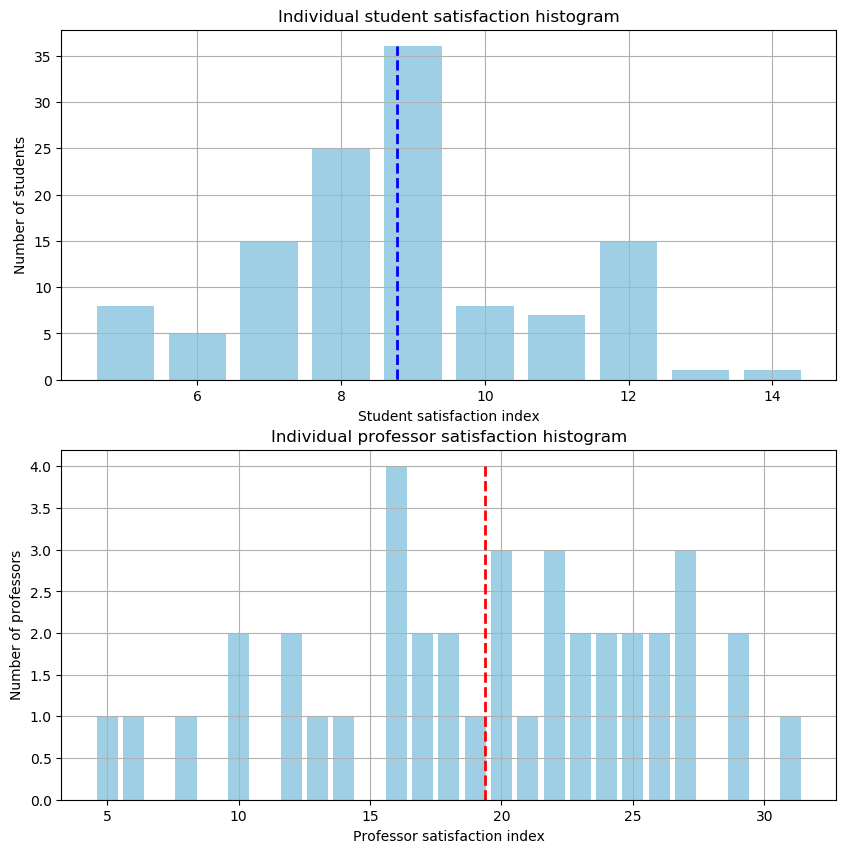

The minimum individual student satisfaction = 5.0
The average individual student satisfaction (blue line) = 8.785123966942148
The minumim individual professor satisfaction = 5.0
The average individual professor satisfaction (red line) = 19.384615384615383


In [15]:
function plotSatisfaction(FS, FP)
    println("The minimum individual student satisfaction = ", minimum(FS))
    println("The average individual student satisfaction (blue line) = ", sum(FS)/length(FS))
    println("The minumim individual professor satisfaction = ", minimum(FP))
    println("The average individual professor satisfaction (red line) = ", sum(FP)/length(FP))

    FS = sort(FS)
    u=unique(FS)
    d=Dict([(i,count(x->x==i,FS)) for i in u])
    d = sort(collect(d), by=x->x[1])
    countt = []
    for item in d
        push!(countt, item[2])
    end

#     dist = fit(Normal, FS)
#     mu = mean(dist)
#     stdd = std(dist)
#     x = [findmin(FS)[1]-2:0.01:findmax(FS)[1]+2;]
#     y = (1/(stdd.*sqrt(2*pi))) .* exp.((-1/2)*((x .- mu)/stdd).^2)
    
    y = [0:0.01:findmax(countt)[1];]
    x = fill(sum(FS)/length(FS), length(y))
    
    #Plot histgram
    fig, (ax1, ax2) = PyPlot.subplots(nrows=2, figsize=(10,10))
    ax1.bar(u,countt,color="#0f87bf",align="center",alpha=0.4)
    ax1.plot(x,y, "--", color = "blue", linewidth=2)
    ax1.axis("tight")
    ax1.set_title("Individual student satisfaction histogram")
    ax1.grid(true)
    ax1.set_xlabel("Student satisfaction index")
    ax1.set_ylabel("Number of students")

    FP = sort(FP)
    u=unique(FP)
    d=Dict([(i,count(x->x==i,FP)) for i in u])
    d = sort(collect(d), by=x->x[1])
    countt = []
    for item in d
        push!(countt, item[2])
    end

#     dist = fit(Normal, FP)
#     mu = mean(dist)
#     stdd = std(dist)

   
    y = [0:0.01:findmax(countt)[1];]
    x = fill(sum(FP)/length(FP), length(y))
    

    ax2.bar(u,countt,color="#0f87bf",align="center",alpha=0.4)
    ax2.plot(x,y, "--", color = "red", linewidth=2)
    ax2.axis("tight")
    ax2.set_title("Individual professor satisfaction histogram")
    ax2.grid(true)
    ax2.set_xlabel("Professor satisfaction index")
    ax2.set_ylabel("Number of professors")
end

# PyPlot.suptitle("Individual satisfaction analysis when alpha = 1")
plotSatisfaction(FS, FP)

;

<a id="alphaanalysis"></a>
### 6.3. Satisfaction Analysis with Various $\alpha$

As mentioned earlier, the $\alpha$ value could be adjusted depends on how we would like to weight the satisfaction of students and professors. We knew that when $\alpha$ equals to 1, which indicates the satisfaction of the students would be maximized, the average student satisfaction index and the average professor satisfaction index approximately equal to 8.8 and 17.7. 

Let's now decrease $\alpha$ to 0.5, which means the importance of the students and the professors are equally weighted. 

In [16]:
dualsTP, y, FS, FP = createSchedule(TP, CS, CP, N_MIN=2, N_MAX=3, alpha=0.5)
;

Academic license - for non-commercial use only
Academic license - for non-commercial use only
*******************************************************************
*  UW-Madison CS Department - Welcome Weekend Schedule Generator  *
*       Implemented by Mehmet Demirel, Jiaze Ma, Yizhou Yao       *
*                              2020 ©                             *
*******************************************************************

Constraints Enforced:
---------------------------------------------------------------
- Each student will meet with at least 2 faculty member(s).
- Each student will be allowed to meet with at most 3 faculty member(s).
- If a faculty member's schedule permits, he/she can meet multiple students at once.
- Student satisfaction will have a 50.0% effect on the optimal schedule 
    whereas professor satisfaction will have a 50.0% effect. To change this, modify your alpha variable.

Results:
---------------------------------------------------------------
Total num

The average student satisfaction index and the average professor satisfaction index turn to 8.1 and 24.5, respectively - the satisfaction of the students has been slightly sacrificed while the satisfaction of the professors has been significantly improved. The corresponding histogram below shows the improvement in the satisfaction of individual processors while maintaining the great satisfaction rate of the individual students.

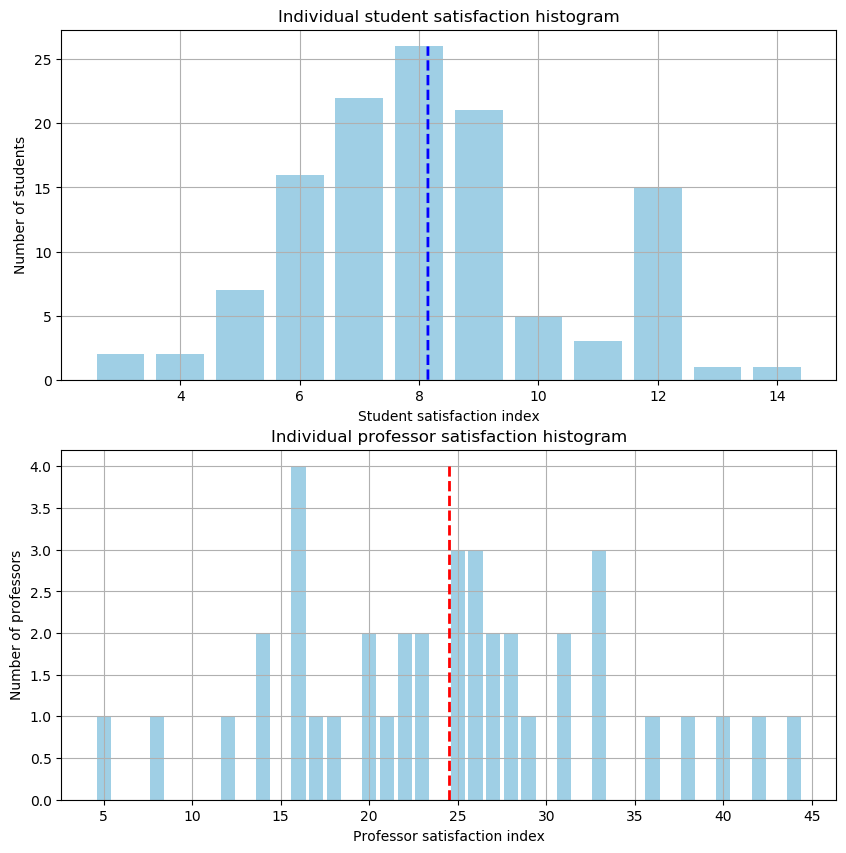

The minimum individual student satisfaction = 3.0
The average individual student satisfaction (blue line) = 8.148760330578513
The minumim individual professor satisfaction = 5.0
The average individual professor satisfaction (red line) = 24.512820512820515


In [17]:
plotSatisfaction(FS, FP);

Let's further decrease the value of $\alpha$ to 0.000001, which favors the satisfaction of the professors and makes the satisfaction of the students insignificant.

In [40]:
dualsTP, y, FS, FP = createSchedule(TP, CS, CP, N_MIN=2, N_MAX=3, alpha=0.000001)
;

Academic license - for non-commercial use only
Academic license - for non-commercial use only
*******************************************************************
*  UW-Madison CS Department - Welcome Weekend Schedule Generator  *
*       Implemented by Mehmet Demirel, Jiaze Ma, Yizhou Yao       *
*                              2020 ©                             *
*******************************************************************

Constraints Enforced:
---------------------------------------------------------------
- Each student will meet with at least 2 faculty member(s).
- Each student will be allowed to meet with at most 3 faculty member(s).
- If a faculty member's schedule permits, he/she can meet multiple students at once.
- Student satisfaction will have a 9.999999999999999e-5% effect on the optimal schedule 
    whereas professor satisfaction will have a 99.9999% effect. To change this, modify your alpha variable.

Results:
------------------------------------------------------

As can be seen, the average student satisfaction index and the average professor satisfaction index would be changed to 6.8 and 25.9, respectively - the satisfaction of the students has been further decreased while the satisfaction of the professor has been improved compared to the previous case. The corresponding histogram below shows the more optimized satisfaction of individual professors, and the satisfaction rate of the individual students has been slightly sacrificed but still acceptable.

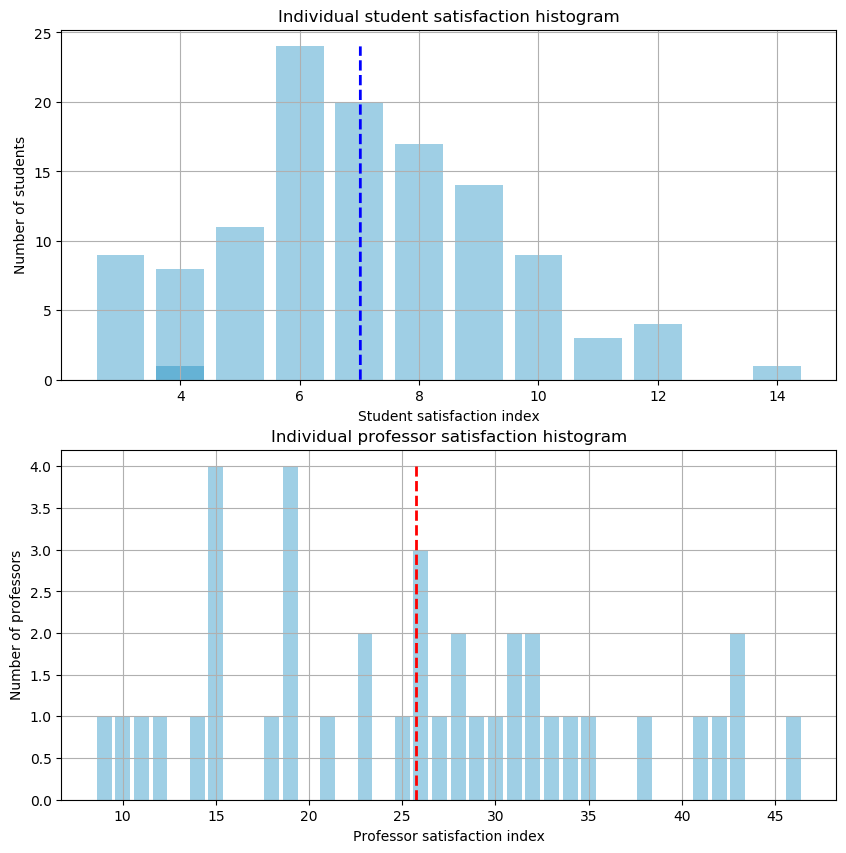

The minimum individual student satisfaction = 3.0
The average individual student satisfaction (blue line) = 7.016528925619835
The minumim individual professor satisfaction = 9.0
The average individual professor satisfaction (red line) = 25.71794871794872


In [41]:
plotSatisfaction(FS, FP);

Let's now take a look at our Pareto curve with different $\alpha$ values. The plot below is the Pareto curve for our bi-objective model. The y-axis represents the average satisfaction index of students whereas the x-axis denotes the average satisfaction index of professors. In this figure, the region above the Pareto curve is the infeasible region and the one below the curve is the suboptimal region. The value of $\alpha$ ranges from $0$ to $1$, with a step size of $0.1$. The plot is obtained by modifying the objective function with different values of $\alpha$. When $\alpha = 0$, the average satisfaction index of students is $6.9$ and the average satisfaction index of professors is $26.5$. When $\alpha = 1$, the average satisfaction index of students is $8.8$ and the average satisfaction index of professors is $19.1$. In order to obtain a comprising solution, we can set value of $\alpha$ as $0.5$. A set of optimal solutions is given for the decision maker to consider so that they can make their final schedule decision based on how they weight the satisfaction of the students vs. that of professors.

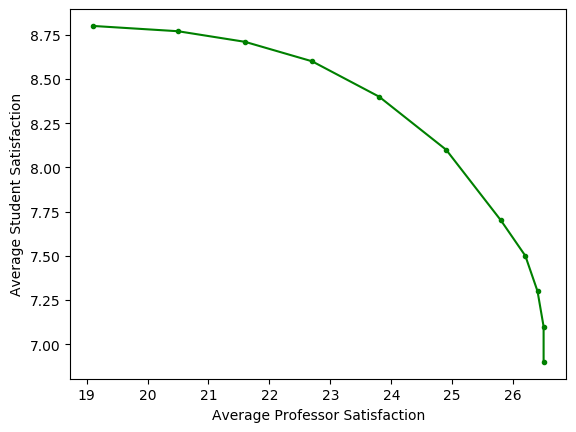

In [4]:
# pareto curve
y =[ 6.9,7.1,7.3,7.5,7.7,8.1,8.4,8.6,8.71,8.77,8.8]
z = [26.5,26.5,26.4,26.2,25.8,24.9,23.8,22.7,21.6,20.5,19.1]
plot(z, y ,"g.-")
xlabel("Average Professor Satisfaction");
ylabel("Average Student Satisfaction")

;

---

<a id="conclusion"></a>
## 7. Conclusion

In this project, we focused on using optimization to schedule student/professor meetings held at graduate student welcome weekends that take place every spring across the country. In this direction, we first obtained real data pertaining to the 2020 Welcome Weekend events of the Computer Sciences department at UW-Madison. We, then, modelled a multi-objective optimization program in order to be able to maximize both students' and professors' satisfaction of their meetings. Afterwards, we [implemented](#code) our model and a number of different helper functions to help us better understand what our model produces. Looking at the [results](#results), we were able to see that our model was capable of generating meeting schedules based on a number of user-defined constraints. 

Furthermore, we wanted to [analyze](#analysis) different aspects of our model to obtain a better understanding of the general picture. Our analysis mainly helped us understand the relevant importance of individual time slots in professors' schedules, which further enabled us to fine-tune our hyperparameters to generate fairer schedules for all students across the board. We were also able to see the distributions of student and professor satisfaction indices, which helped us see whether or not the schedule we have generated was being fair to all students and professors. A set of optimal solutions is given in this report, with different weightings on professor and students. A Pareto curve is used to show the trade-off between the satisfaction of students and professors. The bi-objective function of our model provides potential decision makers with the flexibility of prioritizing the satisfaction of the students or that of the professors.

In the future, we would like to extend this project to a number of different events that take place in the welcome weekend organizations, such as hotel accommodations, dinner table arrangements, and diet optimization. We believe that using optimization to automatically handle these types of events will enable our entire project serve as a general tool that can be used by the organizers of such events. We know that optimization of these different sorts of events does not differ so much from what we have already done in this project in that a very similar skeleton of our model can be used. It is important to note that we did not include the optimization of these events in this project mainly for the purpose of focusing on a particular optimization problem throughout this project. In addition, we did not have real data pertaining to these events and thought that it would not be logical to test a potential optimization model on made-up data.  

As a secondary future direction, we would like to add another objective to our optimization model that aims to minimize the variance of the number of meetings that the students are scheduled. In doing so, we would make sure that no individual student's overall experience is sacrificed for the sake of the overall satisfaction of all students.

---

<a id="authors"></a>
## 8. Author Contributions

The following table demonstrates how much each author contributed to different parts of this project.   


| Part |  Student A | Student B | Student C |
| :---: | :---: | :---: | :---: |
| **Modelling** | 25 % | 50 % | 25 % |
| **Analysis** | 25 % | 25 % | 50 % |
| **Data Gathering** | 33.33 % | 33.33 % | 33.33 % |
| **Implementation** | 50 % | 25 % | 25 % |
| **Report Writing** | 33.33 % | 33.33 % | 33.33 % |  

---

<div align="center">Student A = Mehmet Furkan Demirel </div>
<div align="center">Student B = Jiaze Ma </div>
<div align="center">Student C = Yizhou Yao </div>

---
<a id="acknowledgements"></a>
## 9. Acknowledgements

*We would like to thank our amazing professor **Line A. Roald** and our teaching assistant **Bainian Hao** for their endless efforts to teach us optimization throughout this difficult semester!*  

*We would also like to thank **Angela Thorp**, the graduate coordinator of the Computer Sciences department at UW-Madison, for doing an incredible job every year in organizing the Welcome Weekend events for the graduate students admitted to the department and for inspiring us to embark upon this project!*

---

<div align="center"> Mehmet Demirel, Yizhou Yao, Jiaze Ma </div>
<div align="center"> © 2020  </div>